In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

# Linear regression results

## Slope

In [2]:
# data from chapter 32
insulin_sensitiv = np.array([250, 220, 145, 115, 230, 200, 330, 400, 370, 260, 270, 530, 375])
C2022_fatacids = np.array([17.9, 18.3, 18.3, 18.4, 18.4, 20.2, 20.3, 21.8, 21.9, 22.1, 23.1, 24.2, 24.4])

In [3]:
res = stats.linregress(x=C2022_fatacids, y=insulin_sensitiv)
print(res)

LinregressResult(slope=37.20774574745539, intercept=-486.54199459921034, rvalue=0.7700025428371727, pvalue=0.002077012151479462, stderr=9.295940157270161)


## Graph

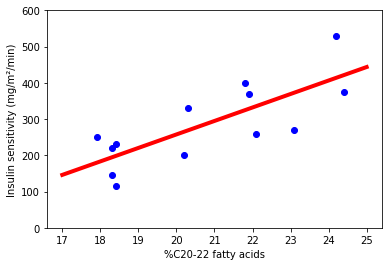

In [4]:
plt.plot(C2022_fatacids, insulin_sensitiv, 'bo', linestyle='None')
plt.ylim(0,600)

x=np.array([17, 25])
plt.plot(x, res.slope*x + res.intercept, 'r-', lw=4)

plt.xlabel('%C20-22 fatty acids')
plt.ylabel('Insulin sensitivity (mg/m²/min)');

## Confidence interval

It is possible to compute the CI using the SE stderr and the critical t ratio for a df of 13 - 2 (we know the slope AND intercept) and alpha = 95% (two-tailed):

In [5]:
alpha=.95
t_ = stats.t(df=len(insulin_sensitiv) - 2).ppf((1+alpha)/2)

In [6]:
CI_slope = (res.slope - t_*res.stderr,
           res.slope + t_*res.stderr)
print(f"Best-fit value of the slope: {res.slope} \n\
CI: {CI_slope}")

Best-fit value of the slope: 37.20774574745539 
CI: (16.747519412284614, 57.667972082626164)


Although the CI is wide, it does not include 0 and doesn't even come close to 0. This is a strong evidence that the observed relationship is very unlikely to be a coincidence of random sampling.

### Plotting CI

c:\program files\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


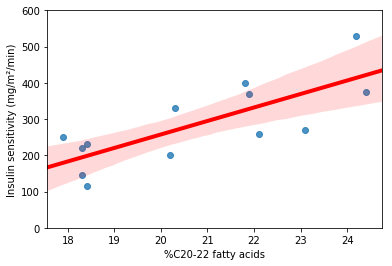

In [7]:
y = np.array([250, 220, 145, 115, 230, 200, 330, 400, 370, 260, 270, 530, 375])
x = np.array([17.9, 18.3, 18.3, 18.4, 18.4, 20.2, 20.3, 21.8, 21.9, 22.1, 23.1, 24.2, 24.4])

import seaborn as sns
sns.regplot(x, y, line_kws={'color':'red', 'linewidth': 4}, )
plt.ylim(0,600)
plt.xlabel('%C20-22 fatty acids')
plt.ylabel('Insulin sensitivity (mg/m²/min)');

### CI bands

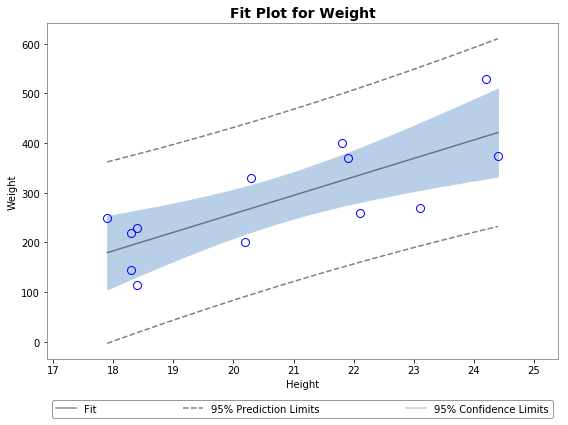

In [8]:
y = np.array([250, 220, 145, 115, 230, 200, 330, 400, 370, 260, 270, 530, 375])
x = np.array([17.9, 18.3, 18.3, 18.4, 18.4, 20.2, 20.3, 21.8, 21.9, 22.1, 23.1, 24.2, 24.4])

import numpy as np
import scipy as sp
import scipy.stats as stats

def plot_ci_manual(t, s_err, n, x, x2, y2, ax=None):
    """Return an axes of confidence bands using a simple approach.

    Notes
    -----
    .. math:: \left| \: \hat{\mu}_{y|x0} - \mu_{y|x0} \: \right| \; \leq \; T_{n-2}^{.975} \; \hat{\sigma} \; \sqrt{\frac{1}{n}+\frac{(x_0-\bar{x})^2}{\sum_{i=1}^n{(x_i-\bar{x})^2}}}
    .. math:: \hat{\sigma} = \sqrt{\sum_{i=1}^n{\frac{(y_i-\hat{y})^2}{n-2}}}

    References
    ----------
    .. [1]: M. Duarte.  "Curve fitting," JUpyter Notebook.
       http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/CurveFitting.ipynb

    """
    if ax is None:
        ax = plt.gca()

    ci = t*s_err*np.sqrt(1/n + (x2-np.mean(x))**2/np.sum((x-np.mean(x))**2))
    ax.fill_between(x2, y2+ci, y2-ci, color="#b9cfe7", edgecolor="")

    return ax


def plot_ci_bootstrap(n, x, y, resid, nboot=500, ax=None):
    """Return an axes of confidence bands using a bootstrap approach.

    Notes
    -----
    The bootstrap approach iteratively resampling residuals.
    It plots `nboot` number of straight lines and outlines the shape of a band.
    The density of overlapping lines indicates improved confidence.

    Returns
    -------
    ax : axes
        - Cluster of lines
        - Upper and Lower bounds (high and low) (optional)  Note: sensitive to outliers

    References
    ----------
    .. [1] J. Stults. "Visualizing Confidence Intervals", Various Consequences.
       http://www.variousconsequences.com/2010/02/visualizing-confidence-intervals.html

    """ 
    if ax is None:
        ax = plt.gca()

    bootindex = sp.random.randint
    nx = n 

    for _ in range(nboot):
        resamp_resid = resid[bootindex(0, len(resid)-1, len(resid))]
        # Make coeffs of for polys
        pc = sp.polyfit(x, y + resamp_resid, 1)                   
        # Plot bootstrap cluster
        ax.plot(x, sp.polyval(pc,x), "b-", linewidth=2, alpha=3.0/float(nboot))

    return ax

# Modeling with Numpy
p, cov = np.polyfit(x, y, 1, cov=True)        # parameters and covariance from of the fit
y_model = np.polyval(p, x)                    # model using the fit parameters; NOTE: parameters here are coefficients

# Statistics
n = y.size                                    # number of observations
m = p.size                                    # number of parameters
DF = n - m                                    # degrees of freedom
t = stats.t.ppf((1+0.95)/2, n - m)            # used for CI and PI bands

# Estimates of Error in Data/Model
resid = y - y_model                           
chi2 = np.sum((resid/y_model)**2)             # chi-squared; estimates error in data
chi2_red = chi2/(DF)                          # reduced chi-squared; measures goodness of fit
s_err = np.sqrt(np.sum(resid**2)/(DF))        # standard deviation of the error


# Plotting --------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(8,6))

# Data
ax.plot(x,y,"o", color="#b9cfe7", markersize=8,
         markeredgewidth=1,markeredgecolor="b",markerfacecolor="None")

# Fit
ax.plot(x,y_model,"-", color="0.1", linewidth=1.5, alpha=0.5, label="Fit")  

x2 = np.linspace(np.min(x), np.max(x), 100)
y2 = np.linspace(np.min(y_model), np.max(y_model), 100)

# Confidence Interval (select one)
plot_ci_manual(t, s_err, n, x, x2, y2, ax=ax)
#plot_ci_bootstrap(n, x, y, resid, ax=ax)

# Prediction Interval
pi = t*s_err*np.sqrt(1+1/n+(x2-np.mean(x))**2/np.sum((x-np.mean(x))**2))   
ax.fill_between(x2, y2+pi, y2-pi, color="None", linestyle="--")
ax.plot(x2, y2-pi, "--", color="0.5", label="95% Prediction Limits")
ax.plot(x2, y2+pi, "--", color="0.5")


# Figure Modifications --------------------------------------------------------
# Borders
ax.spines["top"].set_color("0.5")
ax.spines["bottom"].set_color("0.5")
ax.spines["left"].set_color("0.5")
ax.spines["right"].set_color("0.5")
ax.get_xaxis().set_tick_params(direction="out")
ax.get_yaxis().set_tick_params(direction="out")
ax.xaxis.tick_bottom()
ax.yaxis.tick_left() 

# Labels
plt.title("Fit Plot for Weight", fontsize="14", fontweight="bold")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.xlim(np.min(x)-1,np.max(x)+1)

# Custom legend
handles, labels = ax.get_legend_handles_labels()
display = (0,1)
anyArtist = plt.Line2D((0,1),(0,0), color="#b9cfe7")  # Create custom artists
legend = plt.legend(
          [handle for i,handle in enumerate(handles) if i in display]+[anyArtist],
          [label for i,label in enumerate(labels) if i in display]+["95% Confidence Limits"],
          loc=9, bbox_to_anchor=(0, -0.21, 1., .102), ncol=3, mode="expand")  
frame = legend.get_frame().set_edgecolor("0.5")

# Save Figure
plt.tight_layout();

### Bootstrap

In [10]:
slope, intercept = np.polyfit(C2022_fatacids, insulin_sensitiv, 1)

In [9]:
def draw_bs_pairs_linreg(x, y, size=10000):
    inds = np.arange(len(x))
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)
    for _ in range(size):
        bs_inds=np.random.choice(inds, len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        
        bs_slope_reps[_], bs_intercept_reps[_] = np.polyfit(bs_x, bs_y, 1)
    return bs_slope_reps, bs_intercept_reps

In [11]:
bs_slope, bs_intercept = draw_bs_pairs_linreg(C2022_fatacids, insulin_sensitiv)

In [12]:
CI_slope_bs = np.percentile(bs_slope, [2.5, 97.5])
CI_intercept_bs = np.percentile(bs_intercept, [2.5, 97.5])
print(f"CI of the slope using bootstraping: {CI_slope_bs}")
print(f"CI of the intercept using bootstraping: {CI_intercept_bs}")

CI of the slope using bootstraping: [18.5437009  56.78758863]
CI of the intercept using bootstraping: [-883.11364509 -116.95264747]


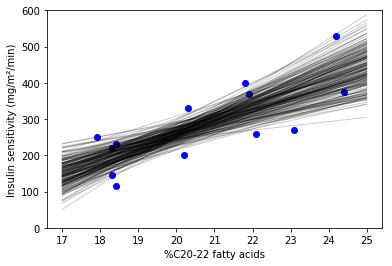

In [13]:
# plt the 200 first pairs of parameters
plt.plot(C2022_fatacids, insulin_sensitiv, 'bo', linestyle='None')
plt.ylim(0,600)

x=np.array([17, 25])

for _ in range(200):
    plt.plot(x, bs_slope[_]*x + bs_intercept[_], 'k-', lw=1, alpha=.2)
    
plt.xlabel('%C20-22 fatty acids')
plt.ylabel('Insulin sensitivity (mg/m²/min)');

## Statistics

In [14]:
Rsq = res.rvalue**2
print(f"R²: {Rsq}")

R²: 0.592903915975712


59% of all variance in insulin sensitivity can be accounted for the linear regression model and the remaining 41% of the variance may be caused by other factors, meaasurement errors, biological variation or a nonlinear relationship between both parameters.

In [16]:
print(f"P value: {res.pvalue}")

P value: 0.002077012151479462


H0 : no linear relationship between both parameters.
If H0 was true, the best-fit line would be horizontal with a slope of zero.
If H0 was, what is the chance that linear regression of data from a random sample of subjects would have a slope as far or farther from zero as that which is observed?

### H0 : no correlation, i.e. slope = 0

In [15]:
# we do permutation on both datasets, compute the slope 10000 times and estimate the P ratio
slope_bs = [stats.linregress(np.random.permutation(C2022_fatacids),
                            np.random.permutation(insulin_sensitiv)).slope for _ in range(10000)]

In [18]:
P_values_bs = np.sum(np.logical_or(slope_bs >= res.slope,
                                   slope_bs <= -res.slope)) / 10000

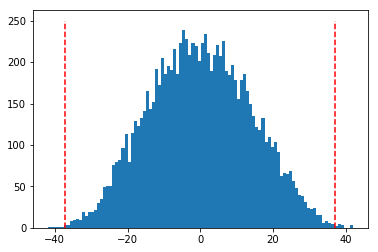

In [17]:
plt.hist(slope_bs, bins=100)
plt.vlines(res.slope, ymin=0, ymax=250, linestyle='--', colors='red')
plt.vlines(-res.slope, ymin=0, ymax=250, linestyle='--', colors='red');

In [ ]:
print(f'P value from boostraping: {P_values_bs}')

## Scikit-learn

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model = LinearRegression().fit(C2022_fatacids.reshape(-1,1), insulin_sensitiv.reshape(-1,1))

In [23]:
print(model.coef_)

[[37.20774575]]


In [24]:
print(model.intercept_)

[-486.5419946]


There is no R (or Statsmodels)-like summary table in sklearn-learn.
Instead, there is statsmodels.regression.linear_model.OLS.fit_regularized class. (L1_wt=0 for ridge regression.). Let's use the statsmodels api

In [25]:
import statsmodels.api as sm
# import statsmodels.formula.api as smf ; possible to use R-like formula with DF

In [30]:
y = np.array([250, 220, 145, 115, 230, 200, 330, 400, 370, 260, 270, 530, 375])
X = np.array([17.9, 18.3, 18.3, 18.4, 18.4, 20.2, 20.3, 21.8, 21.9, 22.1, 23.1, 24.2, 24.4])
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()

In [31]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     16.02
Date:                Wed, 10 Oct 2018   Prob (F-statistic):            0.00208
Time:                        13:40:18   Log-Likelihood:                -73.642
No. Observations:                  13   AIC:                             151.3
Df Residuals:                      11   BIC:                             152.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -486.5420    193.716     -2.512      0.0

c:\program files\python37\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))
